## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.35, 0.7, 0.95, 1.25, 1.55]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = {} and nesterov = {}".format(m, str(nesterov)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-m={},sesterov={}".format(m, str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.35 and nesterov = True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruct

50000/50000 [==============================] - 3s 64us/step - loss: 1.1453 - acc: 0.5974 - val_loss: 1.4851 - val_acc: 0.4689
Epoch 49/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1317 - acc: 0.6035 - val_loss: 1.4201 - val_acc: 0.4985
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1236 - acc: 0.6063 - val_loss: 1.3944 - val_acc: 0.5142
Experiment with MOMENTUM = 0.35 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 3s 58us/step - loss: 1.1040 - acc: 0.6121 - val_loss: 1.3469 - val_acc: 0.5208
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.0929 - acc: 0.6167 - val_loss: 1.4206 - val_acc: 0.5021
Experiment with MOMENTUM = 0.7 and nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

50000/50000 [==============================] - 3s 53us/step - loss: 0.8527 - acc: 0.7006 - val_loss: 1.6555 - val_acc: 0.4909
Experiment with MOMENTUM = 0.7 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8357 - acc: 0.3433 - val_loss: 1.6843 - val_acc: 0.4013
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6072 - acc: 0.4292 - val_loss: 1.5738 - val_acc: 0.4448
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5163 - acc: 0.4605 - val_loss: 1.5390 - val_acc: 0.4508
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4594 - acc: 0.4822 - val_loss: 1.4690 - val_acc: 0.4781
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4068 - acc: 0.4993 - val_loss: 1.4505 - val_acc: 0.4860
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3699 - acc: 0.5156 - val_loss: 1.4686 - val_acc: 0.4717
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3329 - acc: 0.5261 - val_loss: 1.4586 - val_acc

Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6951 - acc: 0.3903 - val_loss: 1.6633 - val_acc: 0.4011
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6078 - acc: 0.4253 - val_loss: 1.5699 - val_acc: 0.4382
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5459 - acc: 0.4471 - val_loss: 1.5143 - val_acc: 0.4642
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5125 - acc: 0.4585 - val_loss: 1.5306 - val_acc: 0.4587
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4618 - acc: 0.4769 - val_loss: 1.4798 - val_acc: 0.4695
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4176 - acc: 0.4944 - val_loss: 1.4752 - val_acc: 0.4754
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3889 - acc: 0.5036 - val_loss: 1.4299 - val_acc: 0.4976
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 57us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1

Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 3.7865 - acc: 0.1049 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.192

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 3.8376 - acc: 0.1024 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.192

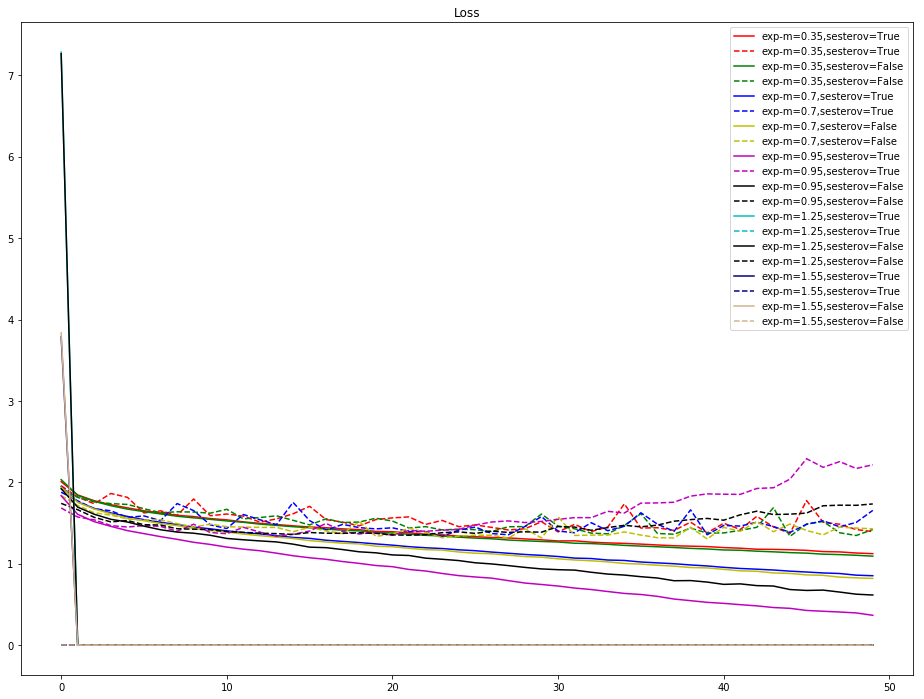

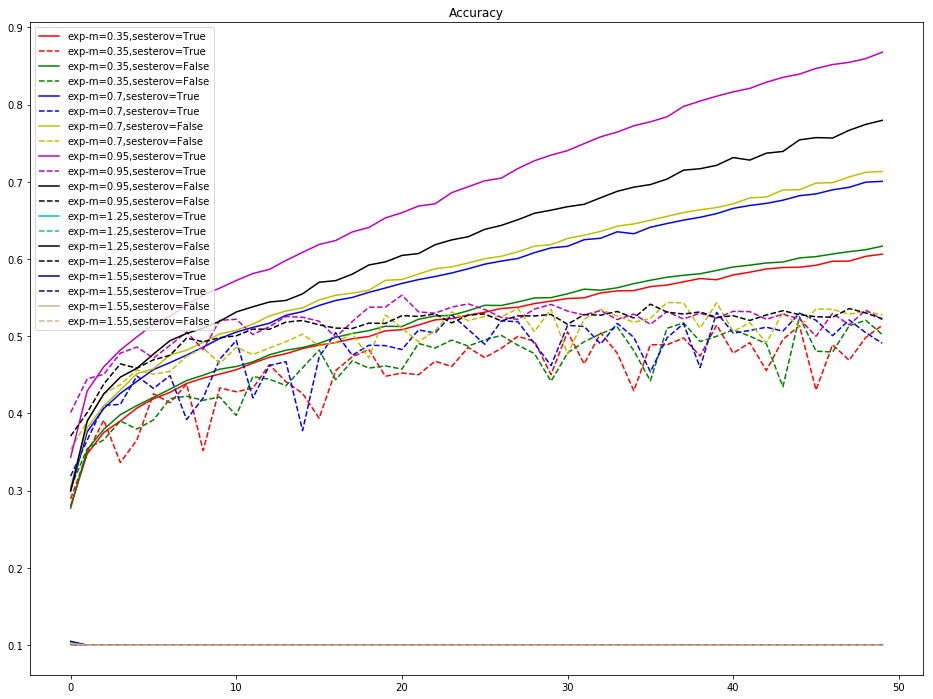

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "k", "navy", "tan"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()